In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
train_data=pd.read_csv('final_train_data.csv')
df=train_data.copy()

In [3]:
df.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [4]:
df.isnull().sum()

Unnamed: 0        0
Country Name      0
Country Code      0
Year              0
Balance           0
Inflation       245
GDP             244
Exports          16
Trade           202
dtype: int64

In [6]:
df['Inflation'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['Inflation']
df['GDP'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['GDP']
df['Exports'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['Exports']
df['Trade'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['Trade']

In [7]:
df.isnull().sum()

Unnamed: 0      0
Country Name    0
Country Code    0
Year            0
Balance         0
Inflation       0
GDP             0
Exports         0
Trade           0
dtype: int64

In [8]:
calc_mean = df.groupby(['Country Name'], axis=0).agg({'Inflation': 'mean'}).reset_index()
calc_mean.columns = ['Country Name','Country_MEAN_Inflation']
df = df.merge(calc_mean, on=['Country Name'],how='left')

calc_mean2 = df.groupby(['Country Name'], axis=0).agg({'GDP': 'mean'}).reset_index()
calc_mean2.columns = ['Country Name','Country_MEAN_GDP']
df = df.merge(calc_mean2, on=['Country Name'],how='left')

calc_mean3 = df.groupby(['Country Name'], axis=0).agg({'Exports': 'mean'}).reset_index()
calc_mean3.columns = ['Country Name','Country_MEAN_Exports']
df = df.merge(calc_mean3, on=['Country Name'],how='left')

calc_mean4 = df.groupby(['Country Name'], axis=0).agg({'Trade': 'mean'}).reset_index()
calc_mean4.columns = ['Country Name','Country_MEAN_Trade']
df = df.merge(calc_mean4, on=['Country Name'],how='left')

In [9]:
df.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,Country_MEAN_Inflation,Country_MEAN_GDP,Country_MEAN_Exports,Country_MEAN_Trade
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298,3.361820,2.965795,1.194865e+09,49.494547
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542,5.734557,2.904634,4.825012e+08,66.699384
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440,9.690943,4.690339,1.104738e+10,31.000266
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422,8.655952,4.017986,4.746749e+08,31.359730
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471,3.254542,5.555967,1.576655e+09,108.820883


In [10]:
import scipy.stats as stat
from matplotlib import pylab
from pylab import *

In [11]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) #1 row 2 columns
    df[feature].hist()
    plt.subplot(1,2,2) #1st row 2nd column 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

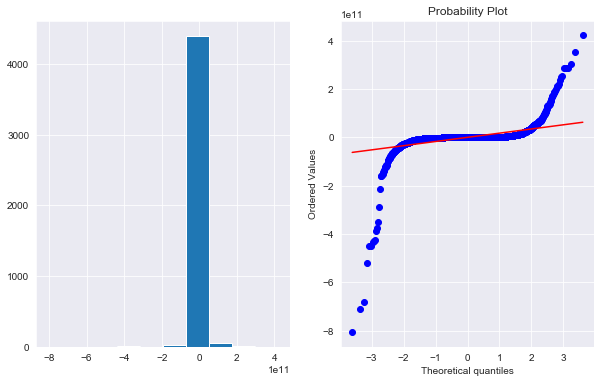

In [12]:
plot_data(df,'Balance')

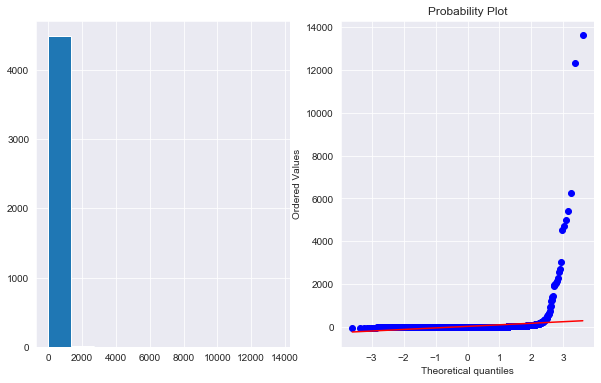

In [13]:
plot_data(df,'Inflation')

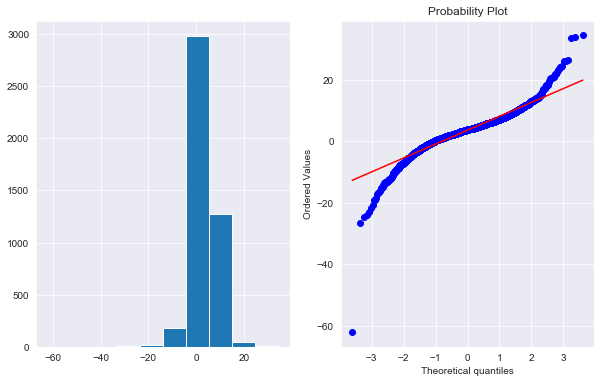

In [14]:
plot_data(df,'GDP')

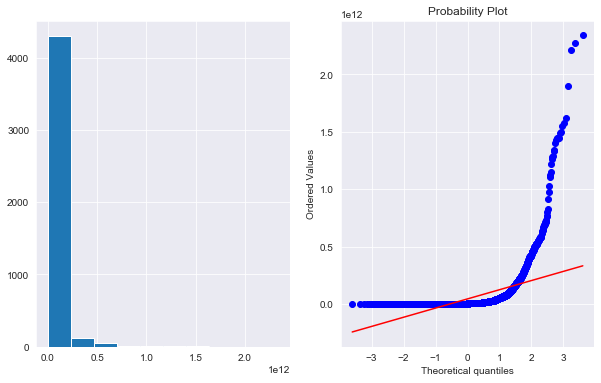

In [15]:
plot_data(df,'Exports')

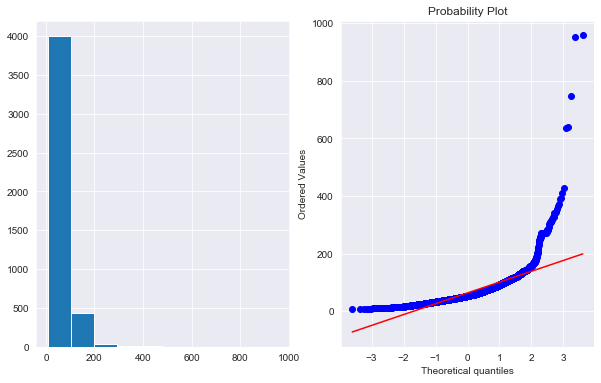

In [16]:

plot_data(df,'Trade')

In [18]:
#Applying Log Transformation to get best distribution for data--->

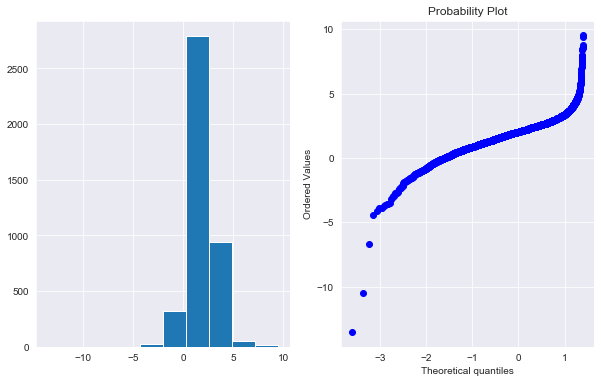

In [19]:
import numpy as np
df['Inflation_log']=np.log(df['Inflation'])
plot_data(df,'Inflation_log')

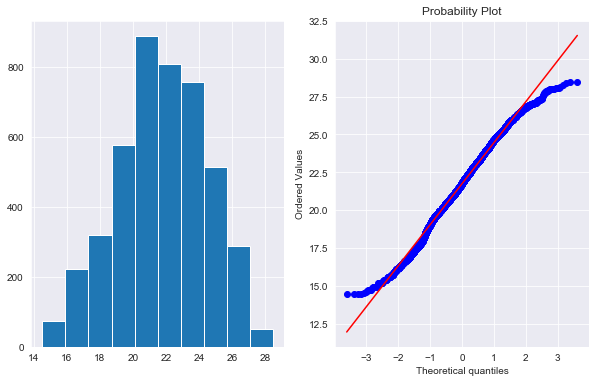

In [20]:
df['Exports_log']=np.log(df['Exports'])
plot_data(df,'Exports_log')

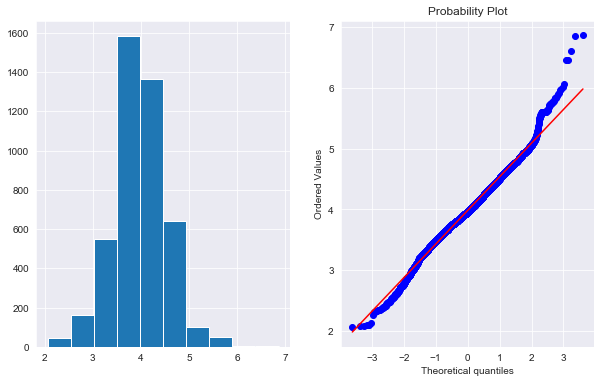

In [21]:
df['Trade_log']=np.log(df['Trade'])
plot_data(df,'Trade_log')

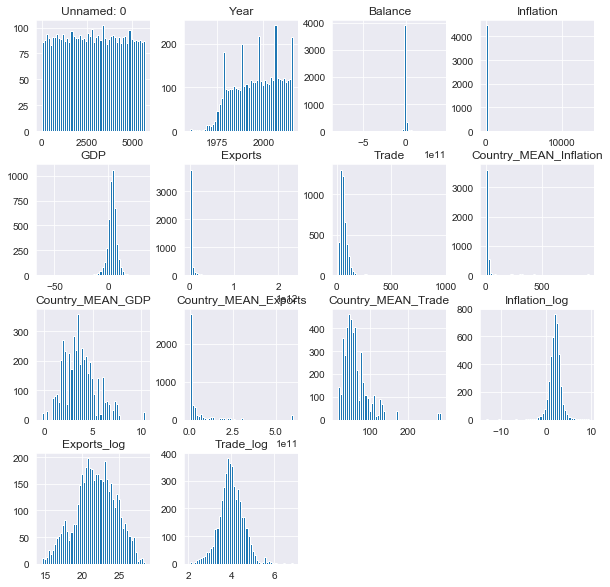

In [23]:
df.hist(bins=50,figsize=(10,10));

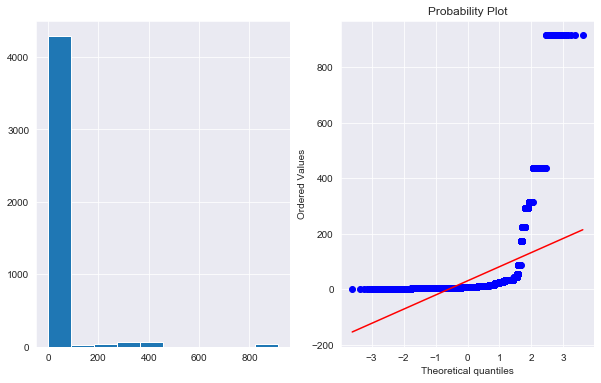

In [24]:
plot_data(df,'Country_MEAN_Inflation')

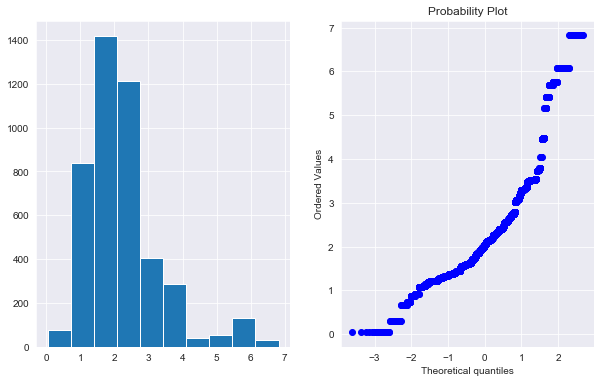

In [25]:
df['Country_MEAN_Inflation_log']=np.log(df['Country_MEAN_Inflation'])
plot_data(df,'Country_MEAN_Inflation_log')

In [26]:
df.columns

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Year', 'Balance',
       'Inflation', 'GDP', 'Exports', 'Trade', 'Country_MEAN_Inflation',
       'Country_MEAN_GDP', 'Country_MEAN_Exports', 'Country_MEAN_Trade',
       'Inflation_log', 'Exports_log', 'Trade_log',
       'Country_MEAN_Inflation_log'],
      dtype='object')

In [28]:
# plot_data(df,'Country_MEAN_GDP')

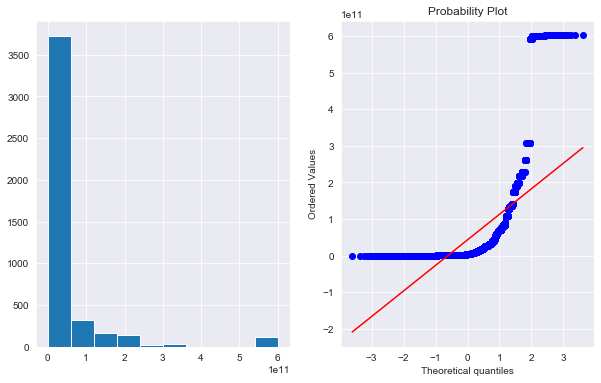

In [29]:
plot_data(df,'Country_MEAN_Exports')

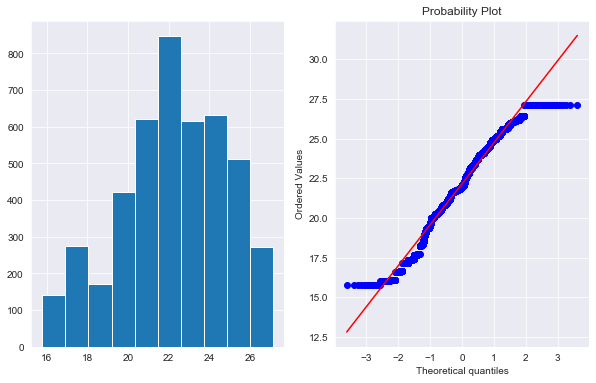

In [30]:
df['Country_MEAN_Exports_log']=np.log(df['Country_MEAN_Exports'])
plot_data(df,'Country_MEAN_Exports_log')

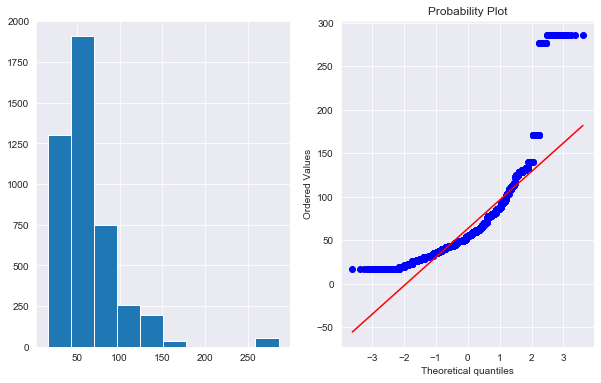

In [31]:
plot_data(df,'Country_MEAN_Trade')

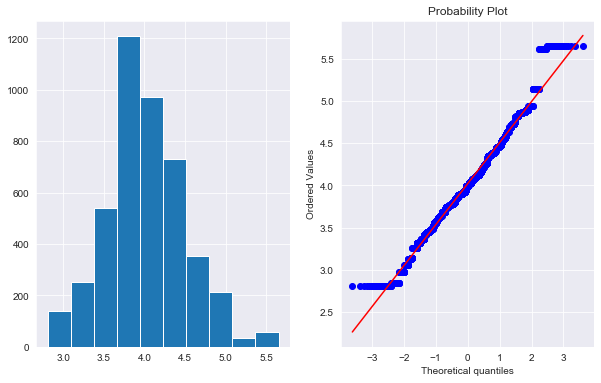

In [32]:
df['Country_MEAN_Trade_log']=np.log(df['Country_MEAN_Trade'])
plot_data(df,'Country_MEAN_Trade_log')

In [33]:
df.head()

,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,Country_MEAN_Inflation,Country_MEAN_GDP,Country_MEAN_Exports,Country_MEAN_Trade,Inflation_log,Exports_log,Trade_log,Country_MEAN_Inflation_log,Country_MEAN_Exports_log,Country_MEAN_Trade_log
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298,3.361820,2.965795,1.194865e+09,49.494547,2.227238,20.241999,4.081332,1.212482,20.901299,3.901862
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542,5.734557,2.904634,4.825012e+08,66.699384,0.618033,20.621262,4.333920,1.746511,19.994494,4.200196
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440,9.690943,4.690339,1.104738e+10,31.000266,2.308277,22.718102,3.540653,2.271192,23.125459,3.433996
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422,8.655952,4.017986,4.746749e+08,31.359730,2.469396,19.062535,3.218012,2.158247,19.978141,3.445525
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471,3.254542,5.555967,1.576655e+09,108.820883,0.472842,21.827628,4.428212,1.180051,21.178571,4.689703


In [34]:
df.columns

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Year', 'Balance',
       'Inflation', 'GDP', 'Exports', 'Trade', 'Country_MEAN_Inflation',
       'Country_MEAN_GDP', 'Country_MEAN_Exports', 'Country_MEAN_Trade',
       'Inflation_log', 'Exports_log', 'Trade_log',
       'Country_MEAN_Inflation_log', 'Country_MEAN_Exports_log',
       'Country_MEAN_Trade_log'],
      dtype='object')

In [35]:
df.drop(['Unnamed: 0','Country Code','Inflation','Exports', 'Trade','Country_MEAN_Inflation','Country_MEAN_Exports', 'Country_MEAN_Trade'],1,inplace=True)

In [36]:
df.head()

,Country Name,Year,Balance,GDP,Country_MEAN_GDP,Inflation_log,Exports_log,Trade_log,Country_MEAN_Inflation_log,Country_MEAN_Exports_log,Country_MEAN_Trade_log
0,Senegal,1983,-3.043829e+08,-5.326393,2.965795,2.227238,20.241999,4.081332,1.212482,20.901299,3.901862
1,Togo,2009,-1.766692e+08,3.510297,2.904634,0.618033,20.621262,4.333920,1.746511,19.994494,4.200196
2,Pakistan,1992,-1.876092e+09,7.705898,4.690339,2.308277,22.718102,3.540653,2.271192,23.125459,3.433996
3,Nepal,1988,-2.714506e+08,7.696809,4.017986,2.469396,19.062535,3.218012,2.158247,19.978141,3.445525
4,Malta,2016,7.269132e+08,5.516617,5.555967,0.472842,21.827628,4.428212,1.180051,21.178571,4.689703


In [38]:
import nltk

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,2),lowercase=True,stop_words=stopwords.words('english'))

In [45]:
country=tf.fit_transform(df['Country Name']).toarray()

In [46]:
country

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
df_num=df[['Year','GDP','Country_MEAN_GDP','Inflation_log','Exports_log','Trade_log','Country_MEAN_Exports_log','Country_MEAN_Trade_log']]

In [63]:
df['Country_MEAN_Inflation_log'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['Country_MEAN_Inflation_log']

In [66]:
df_num.isnull().sum()

Year                        0
GDP                         0
Country_MEAN_GDP            0
Inflation_log               0
Exports_log                 0
Trade_log                   0
Country_MEAN_Exports_log    0
Country_MEAN_Trade_log      0
dtype: int64

In [67]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
X_num=sc.fit_transform(df_num)

In [68]:
X_num

array([[-0.66666667, -2.04192017, -0.2304807 , ...,  0.16768718,
        -0.29408461, -0.15712505],
       [ 0.57142857, -0.06317359, -0.25962533, ...,  0.53425555,
        -0.54736876,  0.32888898],
       [-0.23809524,  0.87632208,  0.59130275, ..., -0.6169738 ,
         0.327156  , -0.91932576],
       ...,
       [ 0.0952381 , -0.35984101, -0.91712855, ..., -0.01672768,
        -1.34404136,  0.09058835],
       [-0.71428571, -1.63968471, -0.14696964, ..., -0.88004582,
         0.03259103, -0.44820666],
       [ 0.85714286,  0.49226174,  0.23642577, ...,  0.9518941 ,
        -0.08784363,  0.66502153]])

In [69]:
X_num.shape

(4506, 8)

In [70]:
y=df.Balance

In [71]:
df_num.isnull().sum()

Year                        0
GDP                         0
Country_MEAN_GDP            0
Inflation_log               0
Exports_log                 0
Trade_log                   0
Country_MEAN_Exports_log    0
Country_MEAN_Trade_log      0
dtype: int64

In [60]:
df['Inflation_log'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['Inflation_log']
df['Country_MEAN_Inflation_log'] = df.groupby(['Country Name']).transform(lambda x: x.fillna(x.median()))['Country_MEAN_Inflation_log']

In [72]:
df_final=np.concatenate((X_num,country),1)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_final,y,test_size=0.10,random_state=42)

In [74]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=500,max_features='auto',verbose=1,n_jobs=-1)
reg.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   40.0s finished


RandomForestRegressor(n_estimators=500, n_jobs=-1, verbose=1)

In [75]:
reg.score(X_train,y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


0.9862196504057537

In [76]:
y_pred=reg.predict(X_test)
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


0.7846544452916363